### importing needed libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from collections import Counter
from sklearn.cluster import KMeans 
import numpy as np 
from scipy.spatial import Voronoi, voronoi_plot_2d


### Choosing a random image

(-0.5, 681.5, 1022.5, -0.5)

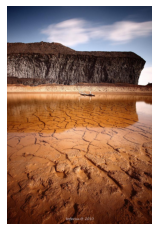

In [50]:
imgs = os.listdir("random images")

n = len(imgs)
idx = np.random.randint(0,n)

img = cv.imread("random images/"+imgs[idx])
img = cv.cvtColor(img , cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')

### Function to convert to hex format

In [6]:
def RGB_HEX(color):
     return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2])) 


### Plotting a pie chart for the extracted colors

In [14]:
def show_color ( img ) :
    
    rimg = img.reshape((img.shape[1]*img.shape[0],3))
    
    md=[]
    
    for i in range(1,21):
        
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(rimg)
        o=kmeans.inertia_
        md.append(o)
    
    kmeans=KMeans(n_clusters=5)
    s=kmeans.fit(rimg)

    centroid=kmeans.cluster_centers_

    labels=kmeans.labels_
    labels=list(labels)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))

    ordered_colors = [centroid[i] for i in counts.keys()]
    hex_colors = [RGB_HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    plt.subplot(1,2,2)
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    

    plt.show()

    return  hex_colors 

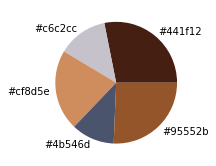

In [51]:
hex_colors = show_color(img)

In [16]:
print(hex_colors)

['#7e9d98', '#475c04', '#c5cbbf', '#839308', '#326c6f']


### plotting the mosaic

(0.0, 1.0, 0.0, 1.0)

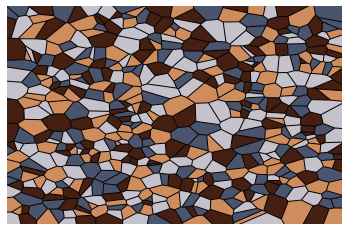

In [52]:
points = np.random.rand(500,2)

points = np.append(points, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)

vor = Voronoi(points)


voronoi_plot_2d(vor,show_points=False ,show_vertices = False)

cnt = 4
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon),hex_colors[cnt])

        cnt = ( cnt - 1 + 4 ) % 4 

plt.xlim([0,1]), plt.ylim([0,1])
plt.axis('off')